## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [48]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('students-data.csv', sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [30]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
#Since out of 395 rows, all columns have 395 non-null => Which means we dont have null values

In [31]:
data.index.name = 'number'

In [32]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [46]:
cat_data=data.select_dtypes(exclude ='number') 
cat_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [115]:
cat_data.shape

(395, 17)

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [42]:
data.var()<1.00

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [44]:
data.drop(['traveltime', 'studytime', 'failures', 'famrel','freetime','freetime','Dalc'],axis=1, inplace=True)

In [45]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [67]:
cat_data.apply(LabelEncoder().fit_transform).head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


OR

In [63]:
labelencoder = LabelEncoder()
for i in range(17):
    cat_data.iloc[:,i] = labelencoder.fit_transform(cat_data.iloc[:,i])

In [64]:
cat_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [68]:
num_data=data.select_dtypes(include ='number')
num_data.head(5)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10


In [116]:
num_data.shape

(395, 10)

In [127]:
st_data=pd.merge(num_data,cat_data,how='outer',on='number')
st_data.head(5)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,1,0,1,1,0,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [128]:
for j in range(7,10):
    for i in range(st_data.iloc[0:,j].size):
        if st_data.iloc[0:,j][i] < 10:
            st_data.iloc[0:,j][i] = 0
        else:
            st_data.iloc[0:,j][i] = 1

In [129]:
st_data.head(5)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,1,...,1,0,0,1,1,0,1,1,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [130]:
X = st_data.drop('G3',axis=1)
X.head(5)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,school,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,0,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,0,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,0,...,1,0,0,1,1,0,1,1,0,0


In [131]:
Y = st_data[['G3']]
Y.head(5)

,G3
number,
0,0
1,0
2,1
3,1
4,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [132]:
import seaborn as sns

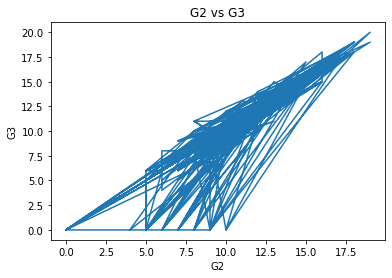

In [139]:
plt.title('G2 vs G3')
plt.plot(data['G2'],data['G3'])
plt.xlabel('G2')
plt.ylabel('G3')
plt.show()

In [ ]:
#G2 and G3 relation looks like linear


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

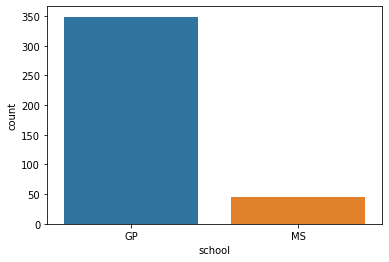

In [146]:
sns.countplot(x='school', data=data)

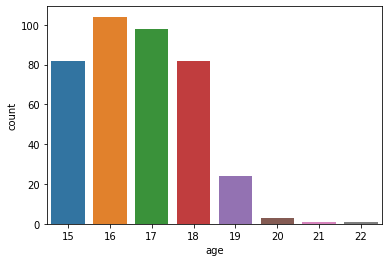

In [144]:
sns.countplot(x='age', data=data)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=95,random_state=0)

In [192]:
X_train.shape

(300, 26)

In [193]:
X_test.shape

(95, 26)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [194]:
model=LogisticRegression()

In [195]:
model.fit(X_train, y_train)

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
prediction=model.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9263157894736842

In [200]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[34  2]
 [ 5 54]]


# Naive bayes with Iris data

### Import Iris.csv

In [407]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [408]:
iris_df.shape

(152, 6)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [409]:
iris_df.drop('Id',axis=1,inplace=True)

In [410]:
iris_df.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [411]:
iris_df.dropna(inplace=True)

In [412]:
Xi = iris_df.drop('Species',axis=1)
Xi.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [413]:
iris_df['Species'] = labelencoder.fit_transform(iris_df['Species'])

In [414]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [415]:
Yi = iris_df[['Species']]
Yi.head(5)

,Species
0,0
1,0
2,0
3,0
4,0


### Find the distribution of target variable (Class)

In [400]:
#Same as below 

### Plot the distribution of target variable using histogram

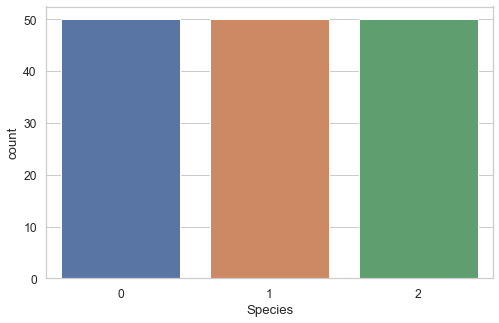

In [416]:
sns.countplot(x='Species', data=iris_df)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\nitis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



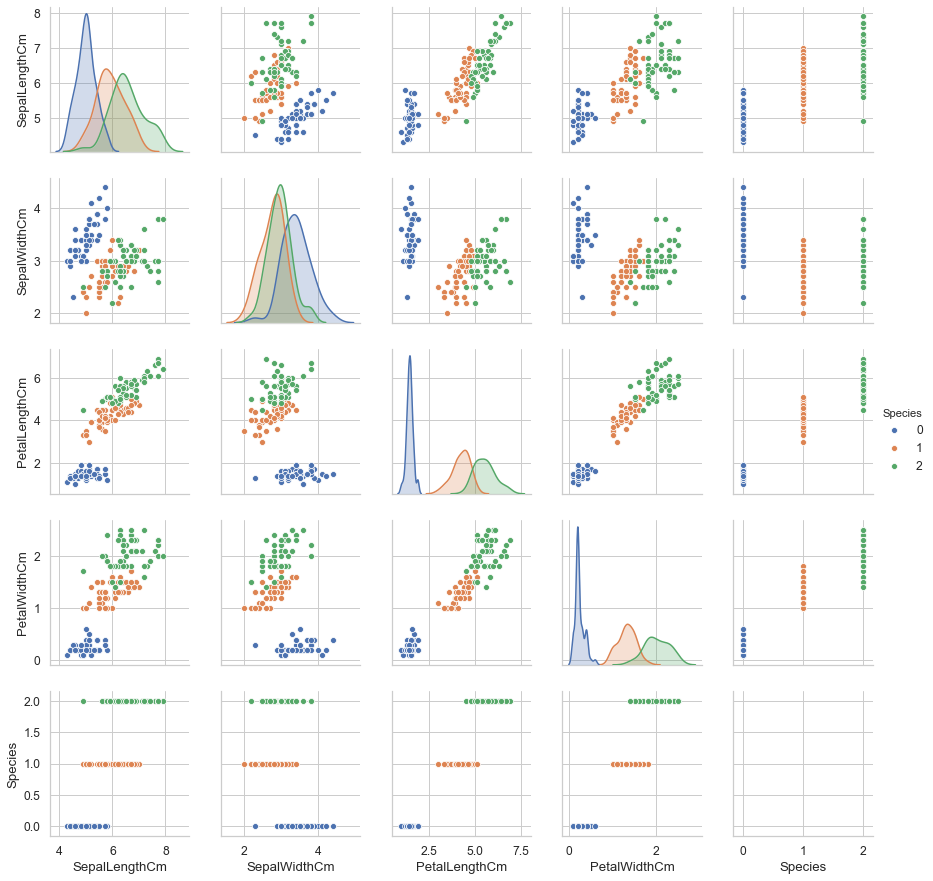

In [367]:
sns.pairplot(iris_df,diag_kind='kde',hue='Species')

 All features means are not overlapping (i.e. they are not equal). This means we can reject Null hypothesis (u0=u1=u2) and accept Alternate hypothesis
 This means no need to drop any features.

### Summary Statistics and explain insights for at least 2 variables

In [417]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Correlation among all variables and give your insights

In [418]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


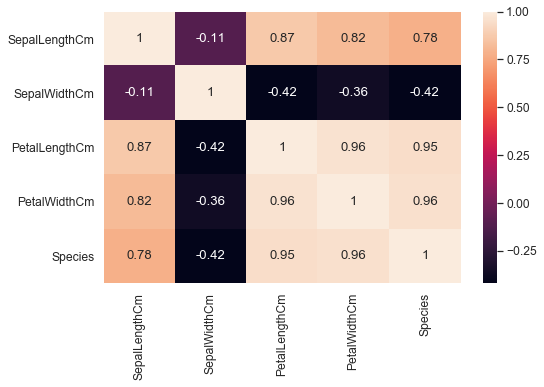

In [419]:
sns.heatmap(iris_df.corr(),annot=True)

PetalLengthCm and PetalWidthCm have highest correlation of 0.96. This means we can keep anyone feature since they are highly correlated.

### Split data in Training and Validation in 80:20

In [420]:
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi,Yi,test_size=0.2,random_state=0)

In [421]:
Xi_train.shape

(120, 4)

In [422]:
Xi_test.shape

(30, 4)

In [423]:
yi_train.shape

(120, 1)

In [424]:
yi_test.shape

(30, 1)

### Do Feature Scaling

In [298]:
from sklearn.preprocessing import StandardScaler

In [425]:
sc=StandardScaler()
sc.fit(Xi_train)
Xis_train = sc.transform(Xi_train)
Xis_test = sc.transform(Xi_test)

In [426]:
Xis_train

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [427]:
Xis_test

array([[-0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [ 0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [ 0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21876435],
       [-1.15816448,  0.10850105, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

In [428]:
Xis_train.shape

(120, 4)

In [429]:
Xis_test.shape

(30, 4)

### Train and Fit NaiveBayes Model

In [430]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB = NB.fit(Xis_train, yi_train)

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [432]:
y_pred_NB=NB.predict(Xis_test)

In [433]:
y_pred_NB

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### Print Accuracy and Confusion Matrix and Conclude your findings

In [436]:
from sklearn.metrics import accuracy_score
accuracy_score(yi_test, y_pred_NB)

0.9666666666666667

In [437]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yi_test, y_pred_NB)
print(confusion_matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
